In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [29]:
def plotReceivers(rec1,rec2,var_array):
    fig,ax= plt.subplots(len(var_array),1,figsize=(10,5*len(var_array)))
    if type(ax) != type(np.ndarray((1))):
        ax = [ax]
            
    for i in range(0,len(var_array)):
        ax[i].plot(rec1["time"],rec1[var_array[i]],label="ExaSeis")
        ax[i].plot(rec2["time"],rec2[var_array[i]],label="Receiver")
        ax[i].legend()
 #       ax[i].set_xlim(0,3.5)
    plt.show()
    

In [30]:
def readAcousticsReceiver(path):
    return readReceiver(path,["time","time1","p","u","v","rho","c"])

def readElasticsReceiver(path):
    return readReceiver(path,["time","time1","u","v","sigma_xx","sigma_yy","sigma_xy"])

def readReceiver(path,columns):
    rec = pd.read_csv(path)
    rename_map = { rec.columns[i]:columns[i] for i in range(len(columns)) }
    rec = rec.rename(columns = rename_map)
    return rec

# Task 0 Acoustics

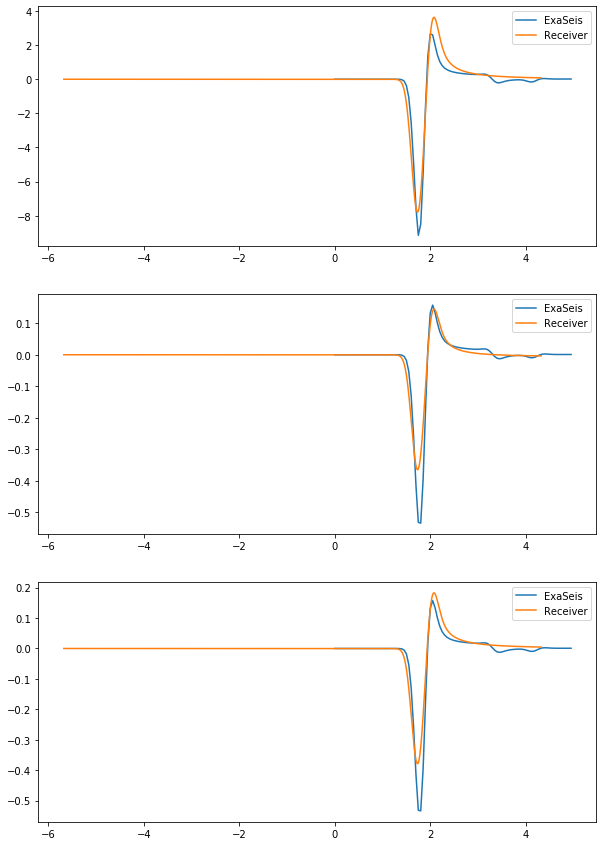

In [31]:
work_dir = "/home/andbro/Desktop/CHEESE/ExaHyPE/Postprocessing/Reference/Acoustics/"

#set the absolute path to the receiver you want to plot
path_exa=f"{work_dir}receiver.probe"
df_exa = readAcousticsReceiver(path_exa)

path_ref=f"{work_dir}receiver.csv"
df_ref = pd.read_csv(path_ref)

plotReceivers(df_exa,df_ref,var_array=["p","u","v"])

# Task 1 Elastics Gaussian

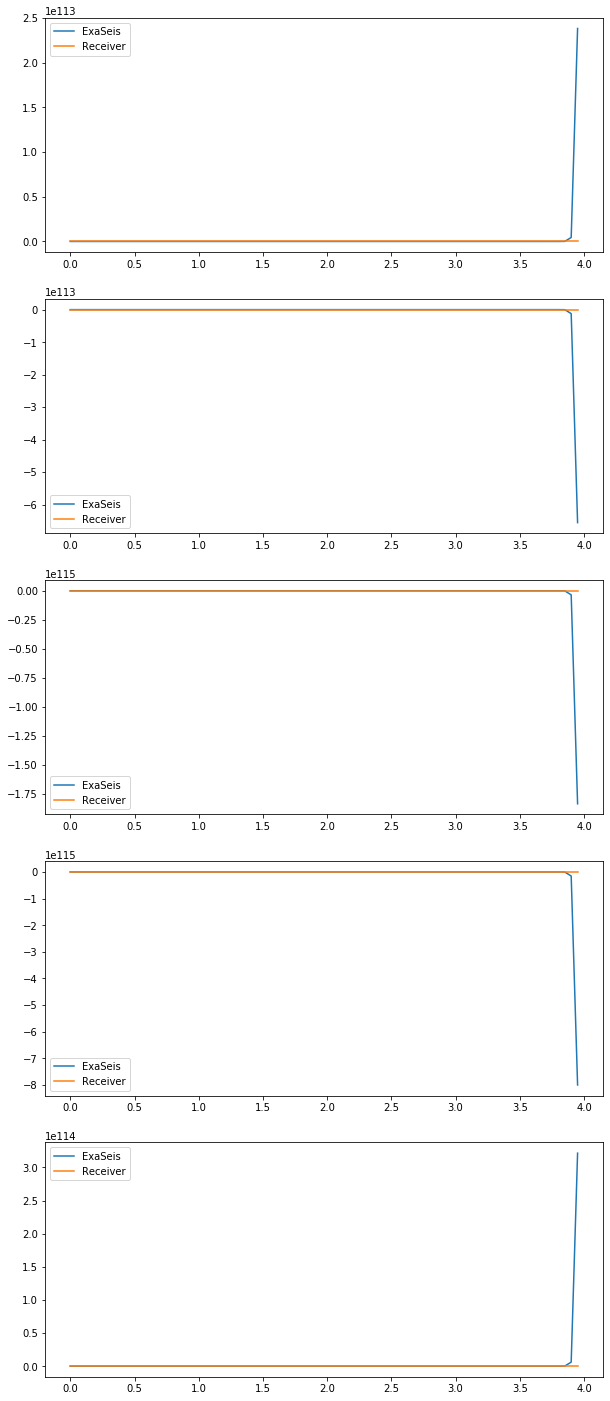

In [35]:
#set the absolute path to the receiver you want to plot
src_dir = "/home/andbro/Desktop/CHEESE/ExaHyPE/Postprocessing/Reference/Elastics/"

df_exa = readElasticsReceiver("/home/andbro/Desktop/CHEESE/ExaHyPE/Applications/Elastics/receiver.probe")

df_ref = pd.read_csv(src_dir+"Gaussian/receiver.csv")
#df_ref["u"] = 1
plotReceivers(df_exa,df_ref,var_array=["u","v","sigma_xx","sigma_yy","sigma_xy"])

# Task 2 Homgeneous Half Space

In [1]:
#set the absolute path to the receiver you want to plot
for rec in range(1,4):
    path_exa="Results/Elastics/receiver_{}.probe".format(rec)
    df_exa = readAcousticsReceiver(path_exa)

    path_ref="Reference/Elastics/Hhs/receiver{}.csv".format(rec)
    df_ref = pd.read_csv(path_ref)

    plotReceivers(df_exa,df_ref,var_array=["u",])

NameError: name 'readAcousticsReceiver' is not defined